# Loan Default Analysis

### Overview

In this project, we will analyse a dataset about defaults in residential real-estate loans. We will approach this as a binary classification problem and attempt to predict whether the borrower will default on the loan or not.

### Goal

Our goal will be to find classifiers that can predict whether the borrower will default or not

While the dataset contains a variety of loans, we will focus our analysis on primary-residence, single-unit properties.



# Data Overview

### Source

The data used for this analysis was obtained from Kaggle and can be found at: https://www.kaggle.com/datasets/yasserh/loan-default-dataset

A .zip archive including the .csv file that contains original data set is also included in the GitHub repository associated with this Final project and can be found at: https://github.com/mpsouza/Final_CSCA5622

### Description

#### Size

The dataset consists of 148,670 entries with 34 columns

#### Columns

The table below lists all columns in the data set and their description as they are presented on Kaggle. The descriptions present in the dataset itself are unfortunately not very insightful.

Fortunately, Kaggle user Vijay Sundaram Mohana posted additional descriptions of the columns that will help with our initial understanding. The original post can be found at: https://www.kaggle.com/datasets/yasserh/loan-default-dataset/discussion/522084

Note that the "Status" column indicates the default status we are looking to predict

|Variable |	Dataset Description|Addtional Description|
|:---------|:-------------|:-------------|
|ID 	|ID|client loan application id|
|Year |	Year|year of loan application|
|loan_limit |	Loan limit|indicates whether the loan is conforming (cf) or non-conforming (ncf)|
|Gender |	Gender|gender of the applicant (male, female, joint, sex not available)|
|approv_in_adv |	Approved in advance|indicates whether the loan was approved in advance (pre, nopre)|
|loan_type |	Loan Type|type of loan (type1, type2, type3)|
|loan_purpose| 	Loan purpose|purpose of the loan (p1, p2, p3, p4)|
|Credit_Worthiness |	Credit worthiness|credit worthiness (l1, l2)|
|open_credit |	Open credit|indicates whether the applicant has any open credit accounts (opc, nopc)|
|business_or_commercial |	Business or commercial|indicates whether the loan is for business/commercial purposes (ob/c - business/commercial, nob/c - personal)|
|loan_amount |	Loan amount|amount of money being borrowed|
|rate_of_interest| Rate of interest |	interest rate charged on the loan|
|Interest_rate_spread | Interest rate spread|	difference between the interest rate on the loan and a benchmark interest rate|
|Upfront_charges |	Upfront charges|initial charges associated with securing the loan|
|term| Term| duration of the loan in months|
|Neg_ammortization 	|Negative ammortization |indicates whether the loan allows for negative ammortization (neg_amm, not_neg)|
|interest_only |	Interest only|indicates whether the loan has an interest-only payment option (int_only, not_int)|
|lump_sum_payment |	Lump sum payment|indicates if a lump sum payment is required at the end of the loan term (lpsm, not_lpsm)|
|property_value 	|Property value|value of the property being financed|
|construction_type 	|Construction type|type of construction (sb - site built, mh - manufactured home)|
|occupancy_type |	Occupancy type|occupancy type (pr - primary residence, sr- secondary residence, ir - investment property)|
|Secured_by |	Secured by|specifies the type of collateral securing the loan (home, land)|
|total_units |	Total units|number of units in the property being financed (1U, 2U, 3U, 4U)|
|income |	Income|applicant's annual income|
|credit_type |	Credit type|applicant's type of credit (CIB - credit information bureau , CRIF - CIRF credit information bureau, EXP - experian , EQUI - equifax)|
|co-applicant_credit_type |	Co-applicant credit type|co-applicant's type of credit (CIB - credit information bureau EXP - experian)|
|Credit_Score |	Credit score|applicant's credit score|
|submission_of_application |	Submission of application|indicates how the application was submitted (to_inst - to institution, not_inst - not to institution)|
|age| Age | the age of the applicant.|
|LTV |	LTV value|loan-to-value ratio, calculated as the loan amount divided by the property value|
|Region |	Region|geographic region where the property is located (North, south, central, North-East)|
|Security_Type |	Security type|type of security or collateral backing the loan (direct, indirect)|
|Status |	Status|indicates whether the loan has been defaulted (1) or not (0)|
|dtir1 |	Dtir 1|debt-to-income ratio|

# Data Cleaning & EDA

### Initial data loading and oveview

We'll start by loading the data into a pandas data frame and inspecting some details about its columns using the info and head methods

In [1]:
import pandas as pd

# Initial data loading and overview
df = pd.read_csv('data/Loan_Default.csv')
print(df.info())
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
5,24895,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,EXP,864,EXP,35-44,not_inst,70.089286,North,direct,0,40.0
6,24896,2019,cf,Joint,pre,type1,p3,l1,nopc,nob/c,...,EXP,860,EXP,55-64,to_inst,79.109589,North,direct,0,44.0
7,24897,2019,NaN,Female,nopre,type1,p4,l1,nopc,nob/c,...,CIB,863,CIB,55-64,to_inst,86.525974,North,direct,0,42.0
8,24898,2019,cf,Joint,nopre,type1,p3,l1,nopc,nob/c,...,CIB,580,EXP,55-64,to_inst,78.765690,central,direct,0,44.0
9,24899,2019,cf,Sex Not Available,nopre,type3,p3,l1,nopc,nob/c,...,CIB,788,EXP,55-64,to_inst,63.444767,south,direct,0,30.0


From the above, we can see the columns match the initial description.

### Data-cleaning: filtering entries to residential loans

We will begin data cleaning by removing entries that don't match the focus of our study.

In [2]:
print(f'Initial number of entries: {df.shape[0]}')

# Drop entries with "business_or_commercial" column values not equal to "nob/c" (not business or commercial).
# This will reduce the entries to residential properties only.
df = df[df['business_or_commercial'] == 'nob/c']
df.drop(columns=['business_or_commercial'], inplace=True)

# Drop entries with an occupancy type other than primary residence, then remove that column.
df = df[df['occupancy_type'] == 'pr']
df.drop(columns=['occupancy_type'], inplace=True)

# Drop entries with an occupancy type other than primary residence, then remove that column.
df = df[df['total_units'] == '1U']
df.drop(columns=['total_units'], inplace=True)

print(f'Number of entries after removal: {df.shape[0]}')

Initial number of entries: 148670
Number of entries after removal: 116435


### Data-cleaning: removing columns of little interest

Next we will remove some columns based on the their semantics and relevance to our study:

- "credit_type" and "co-applicant_credit_type": these columns relate to particular credit rating institutions. While this may be of interest to some audiences, we will remove them to focus on the fundamentals of the loans instead

- "loan_purpose" and "loan_type": these columns are labeled with arbitrary discreet types to which the dataset does not provide enough context to make meaningful interpretations.

In [3]:
# Drop columns per reasoning in the markdown cell above
df.drop(columns=['credit_type', 'co-applicant_credit_type', 'loan_purpose', 'loan_type'], inplace=True)

### Data-cleaning: columns with missing values

We will take a two-step approach to cleaning up data with missing values:

- Columns with few (< 5%) missing values: Remove entries with missing values. As there are not many entries in each, this will not greatly impact the dataset
- Columns with many (>= 5%) missing values: We will inspect them further and decide the approach on a case-by-case basis

In [4]:
import numpy as np

na_pct_threshold = 5.00

cols_missing_many = []
cols_missing_few = []

# Gender column has a value for what is effective missing data, replace it with NaN
df.replace('Sex Not Available', np.nan, inplace=True)

for column in df.columns:
    na_pct = 100.0 * df[column].isna().sum() / df.shape[0]
    if na_pct > na_pct_threshold:
        print(f'{column}: {na_pct:.3f}% missing values')
        cols_missing_many.append(column)
    elif na_pct > 0:
        print(f'{column}: {na_pct:.3f}% missing values')
        cols_missing_few.append(column)

print(f'Removing rows with missing values in columns: {cols_missing_few}')
df.dropna(subset=cols_missing_few, inplace=True)

print(f'Remaining columns with missing values: {cols_missing_many}')

print(f'Number of entries after removal: {df.shape[0]}')

loan_limit: 2.151% missing values
Gender: 25.213% missing values
approv_in_adv: 0.598% missing values
rate_of_interest: 22.353% missing values
Interest_rate_spread: 22.381% missing values
Upfront_charges: 24.652% missing values
term: 0.033% missing values
Neg_ammortization: 0.077% missing values
property_value: 9.959% missing values
income: 4.721% missing values
age: 0.027% missing values
submission_of_application: 0.027% missing values
LTV: 9.959% missing values
dtir1: 14.595% missing values
Removing rows with missing values in columns: ['loan_limit', 'approv_in_adv', 'term', 'Neg_ammortization', 'income', 'age', 'submission_of_application']
Remaining columns with missing values: ['Gender', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'property_value', 'LTV', 'dtir1']
Number of entries after removal: 107673


<Axes: xlabel='column', ylabel='na_pct'>

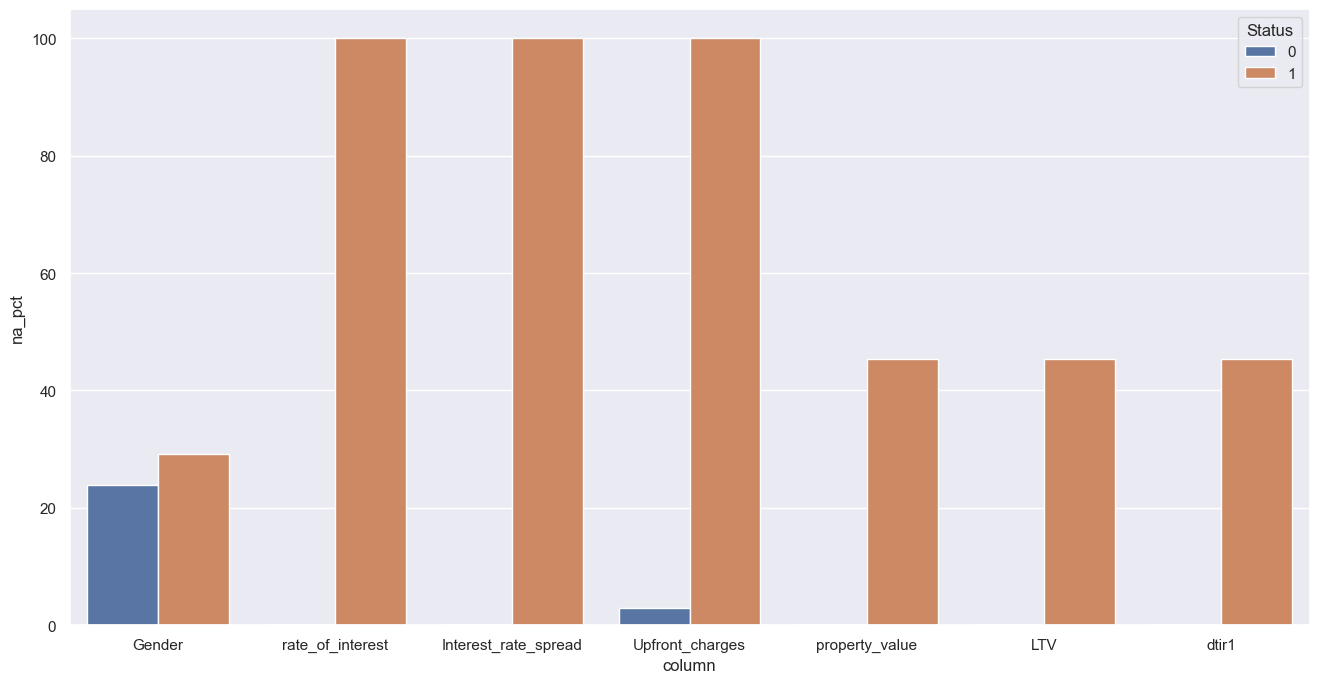

In [5]:
import seaborn as sns

# We will now study how the rate of missing values correlates with the "Status" column before we deicde how to handle the missing values

# Split the data into defaulted and non-defaulted loans
defaulted_df = df[df['Status'] == 1]
non_defaulted_df = df[df['Status'] == 0]

# Count null entries in each column per status
na_count_data = []
for column in cols_missing_many:
    defaulted_na_pct = 100.0 * defaulted_df[column].isna().sum() / defaulted_df.shape[0]
    non_defaulted_na_pct = 100.0 * non_defaulted_df[column].isna().sum() / non_defaulted_df.shape[0]
    na_count_data.append({'column':column, 'na_pct':defaulted_na_pct, 'Status':1})
    na_count_data.append({'column':column, 'na_pct':non_defaulted_na_pct, 'Status':0})

sns.set_theme(rc={'figure.figsize':(16, 8)})
sns.barplot(data=pd.DataFrame(na_count_data), x='column', y='na_pct', hue='Status', )

### Data-cleaning: interpreting rates of missing values

- Gender: The rates of missing values in defaulted and non-defaulted loans are comparable. Since that is not an attribute that is easy to impute, we will remove entries missing those values.

- "rate_of_interest", "Interest_rate_spread" and "Upfront_charges column" are missing from all defaulted loans. This suggests a flaw in the data collection. These columns will be dropped from the analysis as they will not provide predictive value.

- "poperty_value", "LTV" and "dtir1" are only missing from defaulted loans. This again suggests a flaw in the data collection. Because those properties are fundamental components of the loan, we will keep those columns, but drop entries missing those values. While it is unfortunate to drop such a large number of entries, we will still have a dataset of several thousand entries to work with.

In [6]:
# Drop entries with null entries in the columns discussed above
df.dropna(subset=['Gender', 'property_value', 'LTV', 'dtir1'], inplace=True)

# Drop problematic columns discussed above
df.drop(columns=['rate_of_interest', 'Interest_rate_spread', 'Upfront_charges'], inplace=True)

print('Remaining entries after removals:', df.shape[0])

Remaining entries after removals: 72628


### Data-cleaning: reviewing unique values before cleaning categorical columns

Now, let's have a look at the unique value in each cells, which will help guide our next step of data cleaning, related to categorical values

In [7]:
for c in df.columns:
    print(c, df[c].unique())

ID [ 24892  24893  24894 ... 173557 173558 173559]
year [2019]
loan_limit ['cf' 'ncf']
Gender ['Male' 'Joint' 'Female']
approv_in_adv ['pre' 'nopre']
Credit_Worthiness ['l1' 'l2']
open_credit ['nopc' 'opc']
loan_amount [ 406500  456500  696500  706500  346500  376500  226500   76500  156500
  306500  136500  316500  336500  186500  436500  506500  266500  656500
  256500  396500  416500  356500  596500  206500  426500  166500  446500
  286500  196500  486500  466500   56500  586500  326500  906500  386500
  246500  146500  296500  106500  176500  496500  606500 1376500  476500
  236500  676500  366500  716500  636500   86500  616500  116500  826500
  666500  216500  526500  276500  566500  126500  556500  536500  796500
  516500   46500  876500   66500  546500  626500  576500  726500   96500
  686500  746500  896500  806500 1386500  866500  976500  926500  786500
  766500  736500  756500 1136500  966500  646500 1056500 1456500 1276500
  816500 1046500 1326500 3006500 1496500 1466500   

### Data-Cleaning: Categorical Values

Next, we will clean categorical data. We will take one of three approaches for each column:

- Columns with binary categories will remain modeled as one column, but will be converted to booleans

- Convert "Age" from categorical to numerical, approximating to the middle age in each bucket

- Columns with multiple categories will be split into multiple binary columns using the get_dummies method

In [ ]:
# Status: map values to -1 or 1
df['Status'] = df['Status'].map({1: 1, 0: -1})

# loan_limit: 'cf' and 'ncf', for conforming and non-conforming. Convert to binary and rename for clarity
df['conforming_loan'] = df['loan_limit'].map({'cf': True, 'ncf': False})
df = df.drop(columns=['loan_limit'])

# Security_Type: convert to binary and rename for clarity
df['Security_Type_Direct'] = df['Security_Type'].map({'direct': True, 'Indriect': False})
df = df.drop(columns=['Security_Type'])

# submission_of_application: 1 if submitted to institution, 0 if not. Renamed for clarity
df['submission_of_application_to_inst'] = df['submission_of_application'].map({'to_inst': True, 'not_inst': False})
df = df.drop(columns=['submission_of_application'])

# Convert binary categorical columns to True/False
df['interest_only'] = df['interest_only'].map({'int_only': True, 'not_int': False})
df['approv_in_adv'] = df['approv_in_adv'].map({'pre': True, 'nopre': False})
df['open_credit'] = df['open_credit'].map({'opc': True, 'nopc': False})
df['Neg_ammortization'] = df['Neg_ammortization'].map({'not_neg': True, 'neg_amm': False})
df['Credit_Worthiness'] = df['Credit_Worthiness'].map({'l2': True, 'l1': False})
df['lump_sum_payment'] = df['lump_sum_payment'].map({'lpsm': True, 'not_lpsm': False})
df['construction_type'] = df['construction_type'].map({'sb': True, 'mh': False})
df['Secured_by'] = df['Secured_by'].map({'home': True, 'land': False})

# Age: converting categorial ranges to numerical values
df['age'] = df['age'].map({'25-34': 29.5, '35-44': 39.5, '45-54': 49.5, '55-64': 59.5, '65-74': 69.5, '>74': 75, '<25': 24})

# Split multi-categorical columns into binary columns
df = pd.get_dummies(df, columns=['Gender', 'Region'], dummy_na=True)

# Drop any columns that have only one value
single_value_columns = [c for c in df.columns if len(df[c].unique()) == 1]
print(f'Dropping columns with only one value: {single_value_columns}')
df.drop(columns=single_value_columns, inplace=True)

print('Remaining entries after removals:', df.shape[0])

Dropping columns with only one value: ['year', 'Gender_nan', 'Region_nan']
Remaining entries after removals: 72628


In [9]:
# We now can drop the ID column as it has no predictive value
df.drop(columns=['ID'], inplace=True)

# And finally move the "Status" column to the be the first column
status = df.pop('Status')
df.insert(0, 'Status', status)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 72628 entries, 2 to 148669
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Status                             72628 non-null  int64  
 1   approv_in_adv                      72628 non-null  bool   
 2   Credit_Worthiness                  72628 non-null  bool   
 3   open_credit                        72628 non-null  bool   
 4   loan_amount                        72628 non-null  int64  
 5   term                               72628 non-null  float64
 6   Neg_ammortization                  72628 non-null  bool   
 7   interest_only                      72628 non-null  bool   
 8   lump_sum_payment                   72628 non-null  bool   
 9   property_value                     72628 non-null  float64
 10  construction_type                  72628 non-null  bool   
 11  Secured_by                         72628 non-null  bool   

### EDA: parameter value distribution

Now that we cleaned up columns and addressed missing entries, let's explore the distribution of values

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

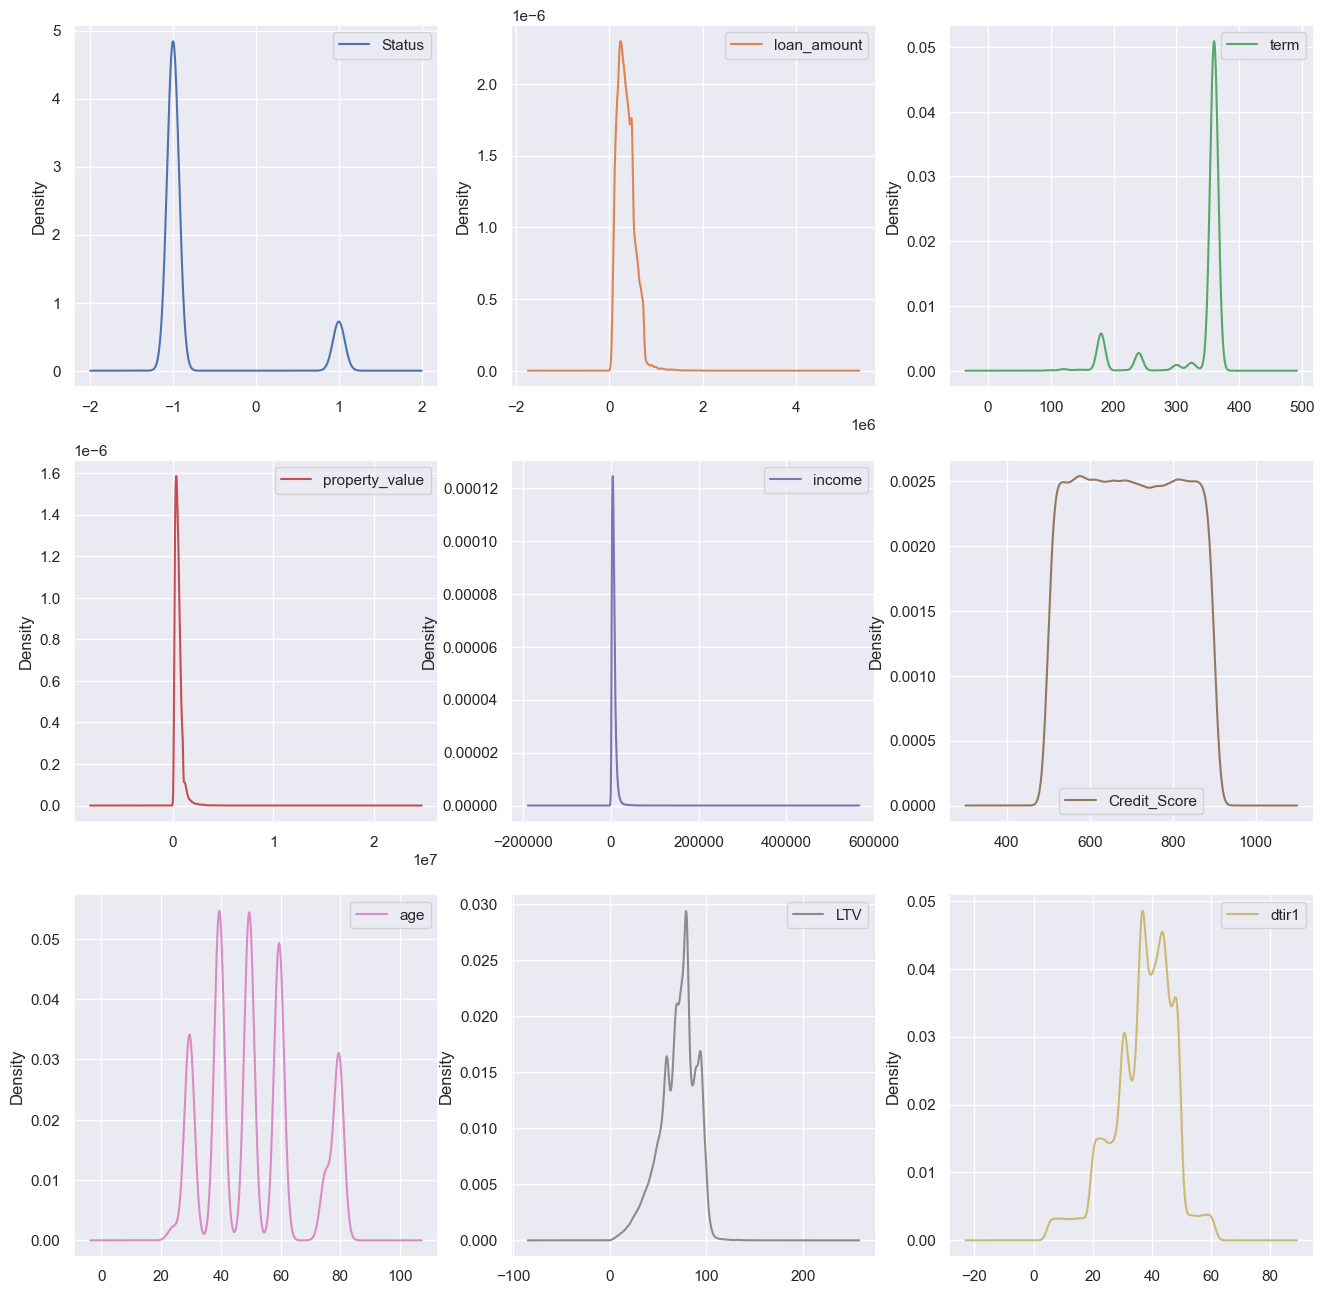

In [10]:
df.select_dtypes(exclude='bool').plot(subplots=True, layout=(3, 3), figsize=(16, 16), kind='kde', sharex=False, sharey=False, include_bool=True)

### Data-cleaning: numerical outliers

From the plots above, it seems like "property_value", "loan_amount" and "income" have some outliers on the high end. Let's clean them up next

In [ ]:
# Print the largest
print(f'Total entries before dropping outliers: {df.shape[0]}')

# While the labels are described as "yearly" income, the vast majority of the values are monthly, with seemingly some outliers in the yearly range
print('Income statistics:')
print(df['income'].describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]))
print('Top 100 incomes:')
print(df['income'].nlargest(100))

# Drop monthly incomes above 23,000 dollars
df = df[df["income"] <= 230000]

# Drop loan amounts above 2 million dollars
df = df[df["loan_amount"] <= 2000000]

# Drop properties above 5 million dollars
df = df[df["property_value"] <= 5000000]

print(f'Total entries after dropping outliers: {df.shape[0]}')

Total entries before dropping outliers: 72628
Income statistics:
count     72628.000000
mean       7135.413339
std        5620.810851
min           0.000000
1%         1320.000000
5%         2160.000000
25%        4080.000000
50%        6060.000000
75%        8760.000000
95%       15120.000000
99%       24480.000000
max      377220.000000
Name: income, dtype: float64
Top 100 incomes:
33621     377220.0
65351     374400.0
31674     235980.0
106871    157320.0
29751     146520.0
            ...   
49896      52080.0
44397      51960.0
134827     51720.0
8215       51540.0
67762      51420.0
Name: income, Length: 100, dtype: float64
Total entries after dropping outliers: 72591


### EDA: Pair-plot of numerical columns

Let's visualize a pair-plot of all the numerical columns. We will use the "Status" column as the hue of the plots to help identify patterns.

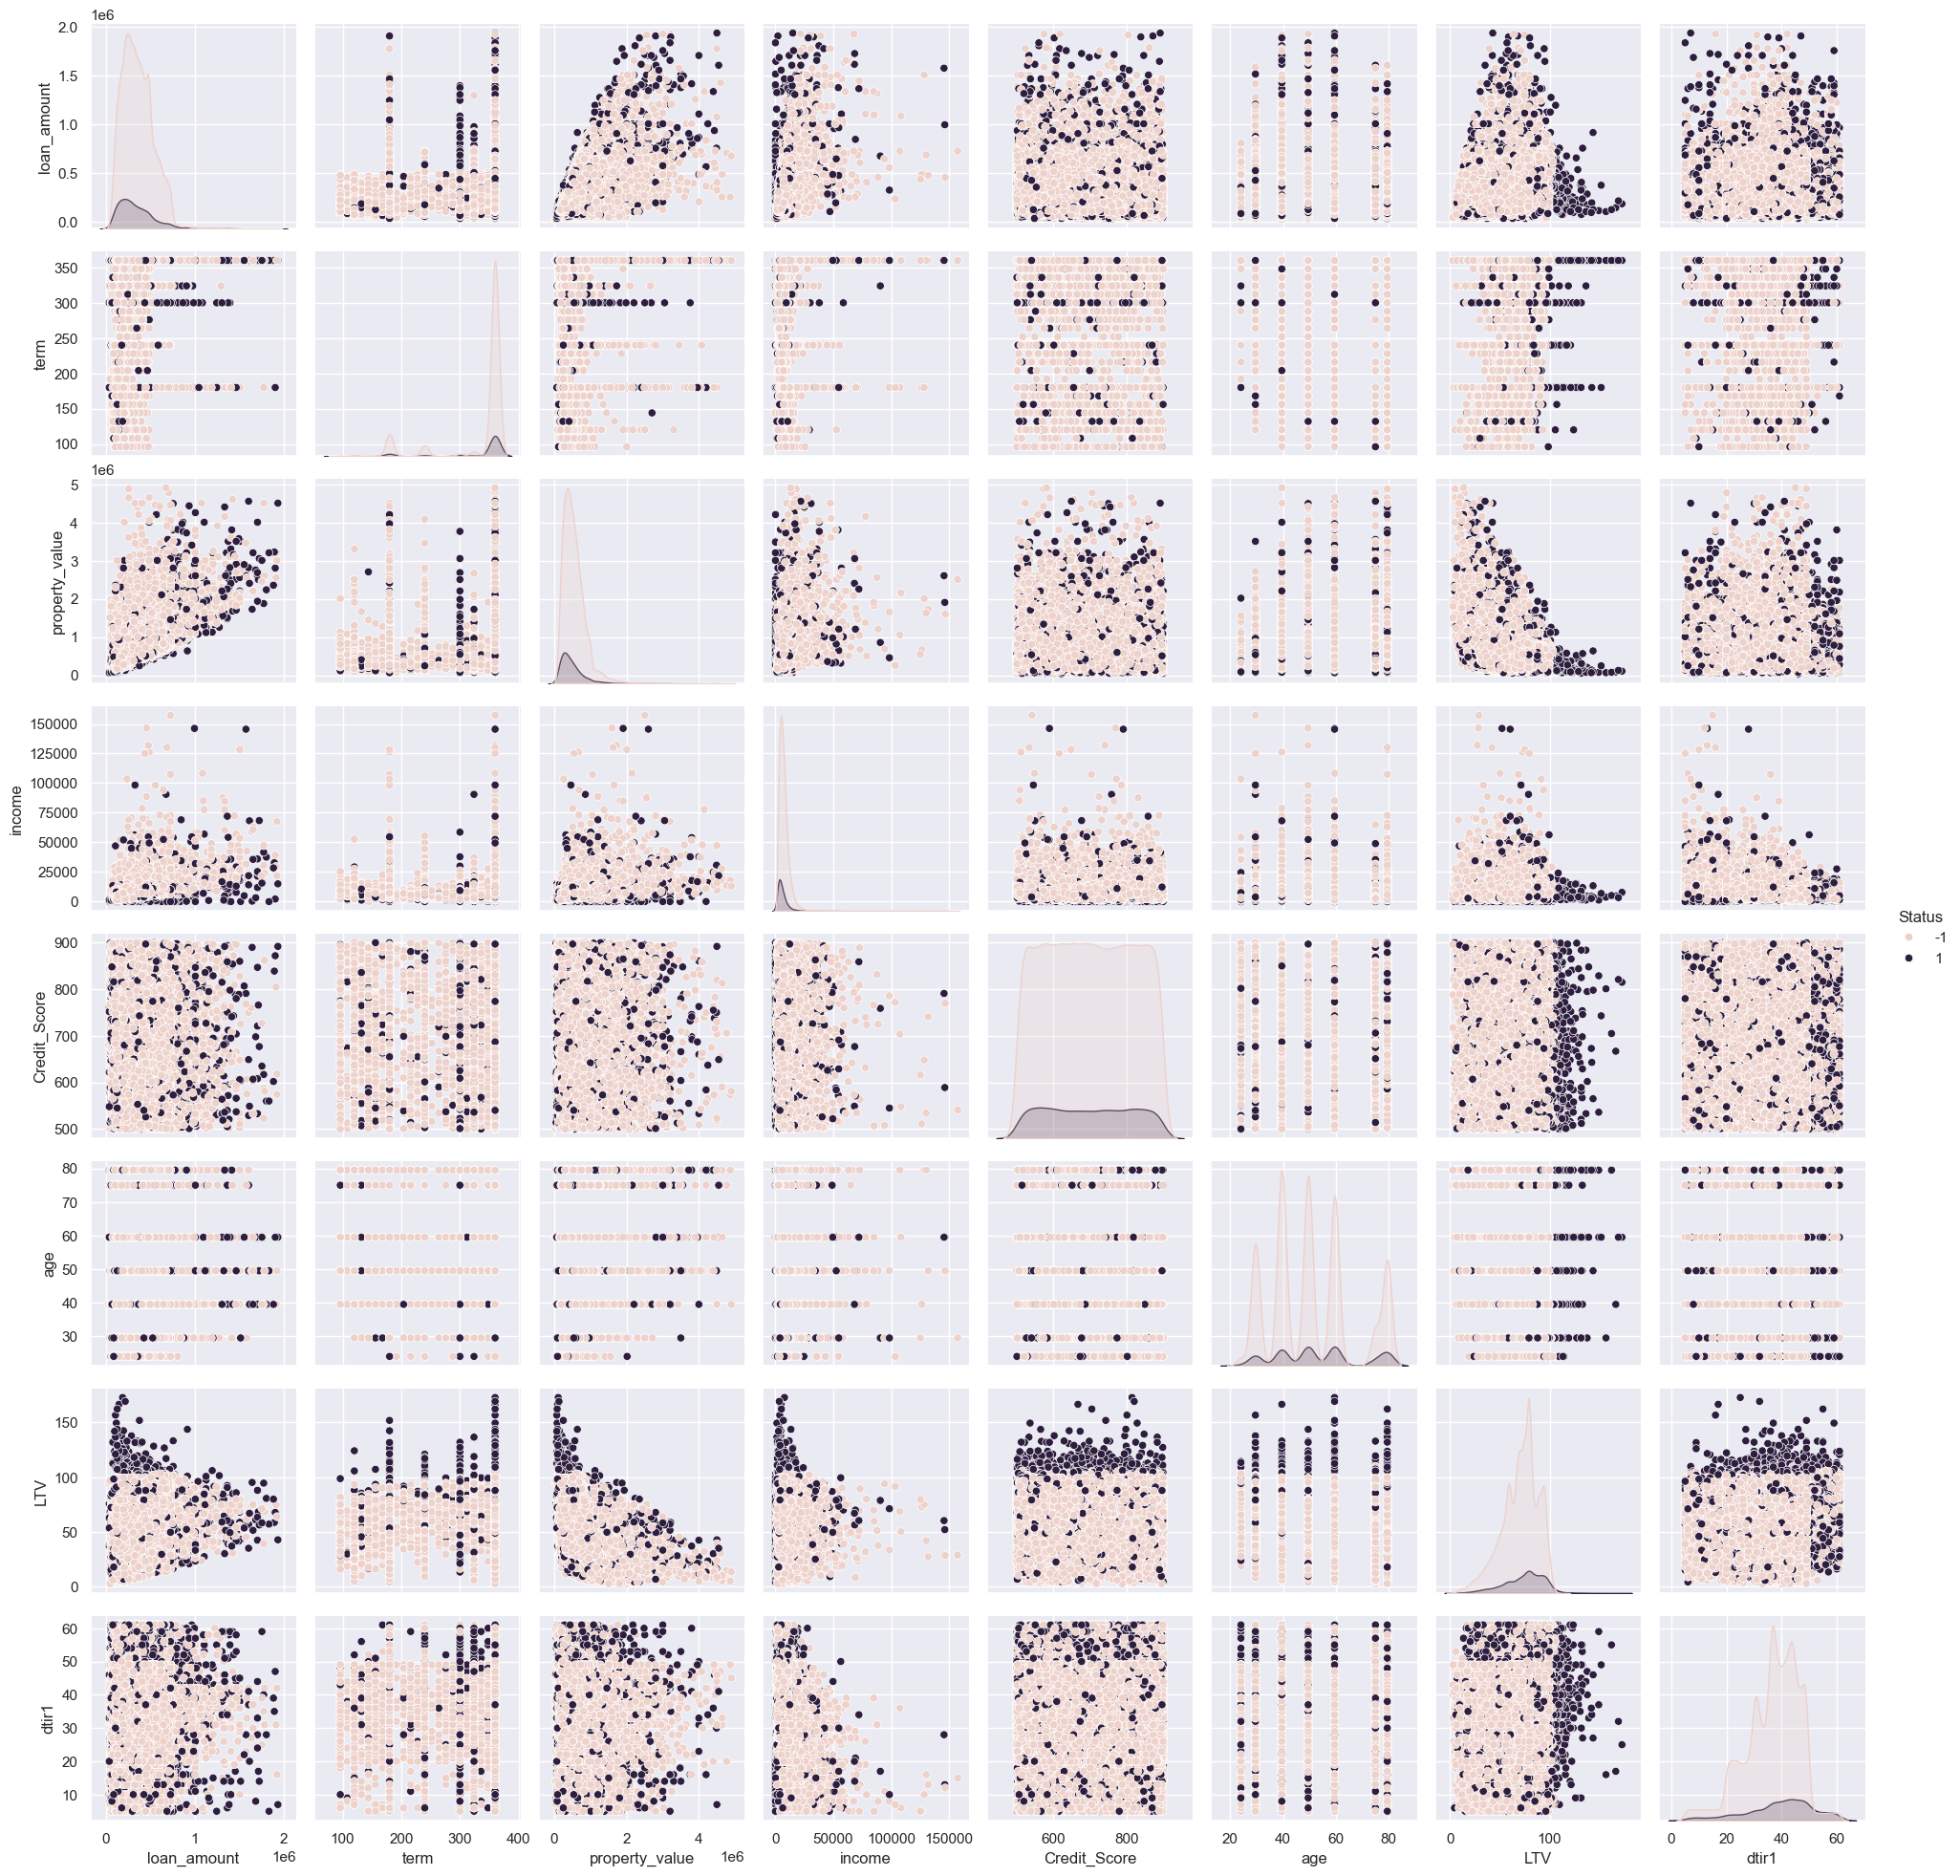

In [12]:
# Pair-plot of status and the numerical columns
sns.pairplot(df.select_dtypes(exclude='bool'), diag_kind='kde', hue='Status')

### EDA: Pair-plot analysis

There are several insights we can glean from the pair plot and use of hue.

- 300-months is by far the most common terms.

- High LTV seems to be a strong, at-a-glance indicator of default. So does high debt-to-income ratio. Both are in line with general financial wisdom.

- Surprisingly, credit score does not jump out as a strong predictor

### EDA: Correlation Matrix

Because there is a large number of features, we will select a few with highest correlation to "Status" to display in a correlation matrix

<Axes: >

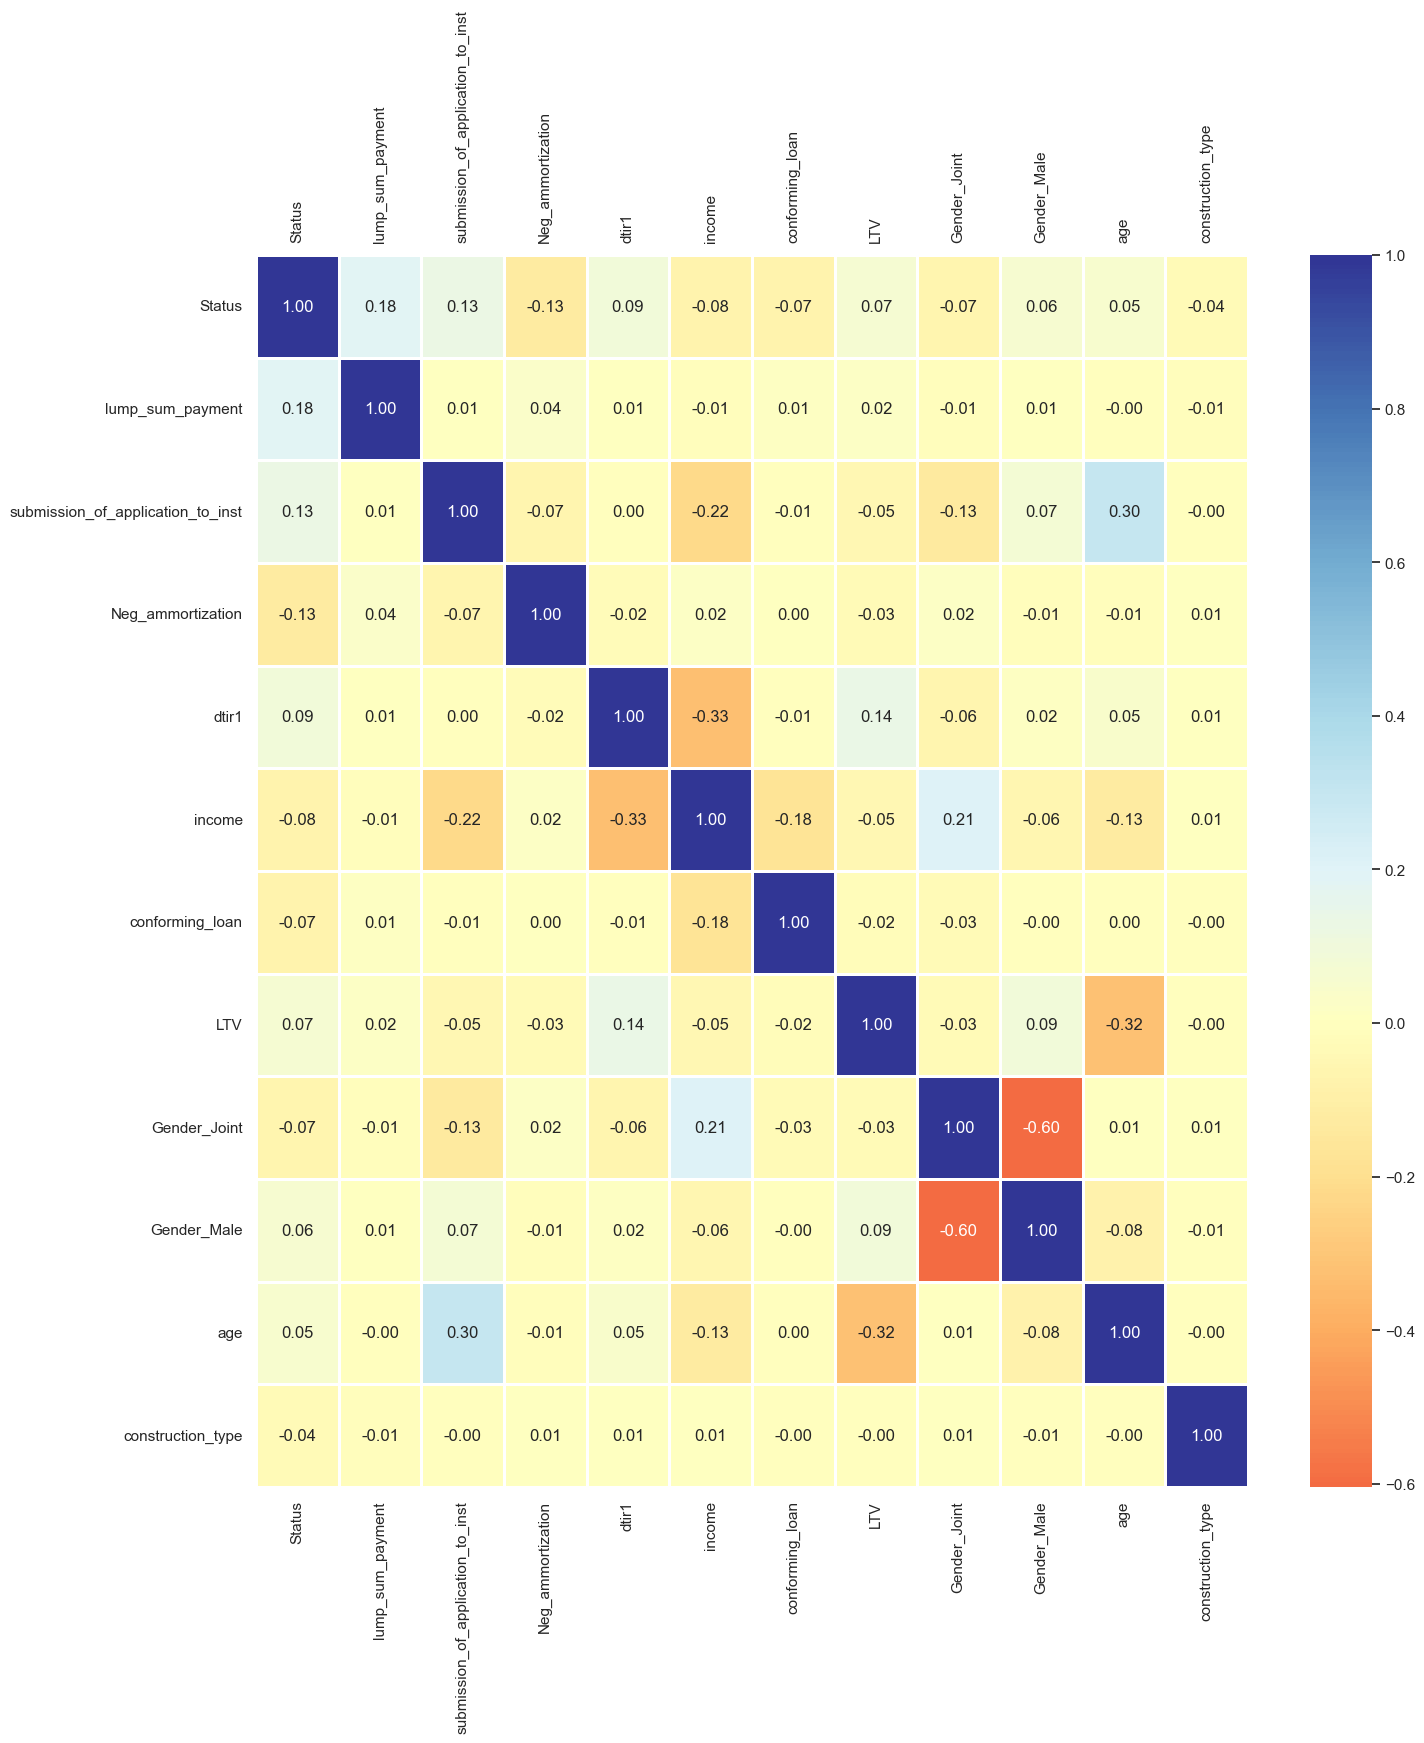

In [13]:
import matplotlib.pyplot as plt

correlation_to_status = []

for column in df.columns:
    correlation_to_status.append((abs(df[column].corr(df['Status'])), column))

# Sort correlation_to_status by the 1st element of the tuple (correlation value)
correlation_to_status = sorted(correlation_to_status, key=lambda x: x[0], reverse=True)

# Select the most correlated columns to the Status column as a list
most_correlated = [column for _, column in correlation_to_status[:12]]

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(16,16))
plt.tick_params(labeltop=True)
sns.heatmap(df[most_correlated].corr(), annot=True, linewidth=1, fmt=".2f", center=0, cmap="RdYlBu")

### EDA: Correlation Matrix analysis

Let's discuss some of the parameters most strongly correlated to "Status"

- Lump sum paymement has a mild positive correlation with defaults. Perhaps these are due to borrower's inability to make that payment at the end of the term.
- Negative ammortization has a negative correlation with defaults. Perhaps due to such loans having smaller monthly obligations.
- Income and gender_join also have negative correlation with defaults. Perhaps this is due to greater availability of monthly income to meet the loan obligations.

As for some of the correlations between parameters:

- Gender_Male and Gender_Join have a strong negative correlation. This is explained by those columns being mutually exclusive, given they are dummies for the original Gender categorical column
- "income" and "dirt1" (debt-to-income ratio) are negatively correlated, as expected given they have an inverse relation by definition
- "income" and gender_joint have a positive correlation. This is likely due to having more than one person contributing to the income


### Models: preparing training data

We will now split our data intro training and test sets to train and validate our models

In [14]:
from sklearn.model_selection import train_test_split

y = df['Status'].values
X = df.drop('Status', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)


### Modeling: Single Decision Tree

Let's attempt to model a Decision Tree

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score

# Perform a grid search using a range of values for the "max_leaf_nodes" and "max_depth" parameters used by DecisionTreeClassifier, fitting with the training data
param_grid = {'max_leaf_nodes': np.logspace(2, 16, base=2, num=8, dtype=int).tolist(), 'max_depth': np.linspace(4, 64, num=8, dtype=int).tolist()}
grid=GridSearchCV(estimator=DecisionTreeClassifier(), cv=3, param_grid=param_grid, scoring="recall")
grid.fit(X_train, y_train)

# Validate best estimator using the test data
y_pred = grid.best_estimator_.predict(X_test)
validation_recall = recall_score(y_test, y_pred)

# Print out results
print(f'Validation recall: {validation_recall:.2f} | Training Recall: {grid.best_score_:.2f} | parameters: {grid.best_params_}')

Validation recall: 0.37 | Training Recall: 0.37 | parameters: {'max_depth': 64, 'max_leaf_nodes': 16384}


### Single Decision Tree - Results

Using an 8x8 grid (64 iterations), it took 29.5s to find the best tree. It had a training recall of 0.36 and a validation recall of 0.37.

The best tree's parameters were max_depth=46 and max_leaf_nodes=65536

### Modeling: AdaBoost tree ensemble

In [16]:
from sklearn.ensemble import AdaBoostClassifier

# Perform a grid search using a range of values for the "learning_rate" and "n_estimators" parameters used by AdaBoostClassifier, fitting with the training data
param_grid = {'learning_rate': [0.1, 0.5, 1.0], 'n_estimators': [100, 500, 1000, 5000]}
grid=GridSearchCV(estimator=AdaBoostClassifier(algorithm="SAMME"), cv=3, param_grid=param_grid, scoring="recall", n_jobs=12)
grid.fit(X_train, y_train)

# Validate best estimator using the test data
y_pred = grid.best_estimator_.predict(X_test)
validation_recall = recall_score(y_test, y_pred)

# Print out results
print(f'Validation recall: {validation_recall:.2f} | Training Recall: {grid.best_score_:.2f} | parameters: {grid.best_params_}')

Validation recall: 0.19 | Training Recall: 0.20 | parameters: {'learning_rate': 1.0, 'n_estimators': 5000}


### AdaBoost ensemble - Results
Using an 3x4 grid (12 iterations) in 12 parallel jobs, it took 12m16s to find the ensemble. It had a training recall of 0.20 and a validation recall of 0.19

The best parameters were a learning_rate=1 and n_estimators=5000

### Modeling: GradientBoost ensemble

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

# Perform a grid search using a range of values for the "learning_rate" and "n_estimators" parameters used by GradientBoostingClassifier, fitting with the training data
param_grid = {'learning_rate': [0.1, 0.5, 1.0], 'n_estimators': [100, 500, 1000, 5000]}
grid=GridSearchCV(estimator=GradientBoostingClassifier(), cv=3, param_grid=param_grid, scoring="recall", n_jobs=12)
grid.fit(X_train, y_train)

# Validate best estimator using the test data
y_pred = grid.best_estimator_.predict(X_test)
validation_recall = recall_score(y_test, y_pred)

# Print out results
print(f'Validation recall: {validation_recall:.2f} | Training Recall: {grid.best_score_:.2f} | parameters: {grid.best_params_}')

Validation recall: 0.31 | Training Recall: 0.33 | parameters: {'learning_rate': 0.5, 'n_estimators': 5000}


### GradientBoostingClassifier results

Using an 3x4 grid (12 iterations) in 12 parallel jobs, it took 7m40s to find the ensemble. It had a training recall of 0.33 and a validation recall of 0.31

The best parameters were a learning_rate=0.5 and n_estimators=5000

### Modeling: RandomForestClassifier ensemble

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Perform a grid search using a range of values for the "learning_rate" and "n_estimators" parameters used by GradientBoostingClassifier, fitting with the training data
param_grid = {'max_depth': [8, 32, 64], 'n_estimators': [100, 500, 1000, 5000]}
grid=GridSearchCV(estimator=RandomForestClassifier(), cv=3, param_grid=param_grid, scoring="recall", n_jobs=12)
grid.fit(X_train, y_train)

# Validate best estimator using the test data
y_pred = grid.best_estimator_.predict(X_test)
validation_recall = recall_score(y_test, y_pred)

# Print out results
print(f'Validation recall: {validation_recall:.2f} | Training Recall: {grid.best_score_:.2f} | parameters: {grid.best_params_}')

/Users/marcos/Projects/mscs/04 - CSCA5622 - Intro to ML/.venv/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Validation recall: 0.28 | Training Recall: 0.27 | parameters: {'max_depth': 32, 'n_estimators': 500}


### RandomForestClassifier results

Using an 3x4 grid (12 iterations) in 12 parallel jobs, it took 7m49s to find the ensemble. It had a training recall of 0.27 and a validation recall of 0.27

The best parameters were a max_depth=64 and n_estimators=5000

### Modeling: KNeighborsClassifier

In [19]:
from sklearn.neighbors import KNeighborsClassifier

# Perform a grid search using a range of values for the "learning_rate" and "n_estimators" parameters used by GradientBoostingClassifier, fitting with the training data
param_grid = {'n_neighbors': [3, 5, 11, 49]}
grid=GridSearchCV(estimator=KNeighborsClassifier(), cv=3, param_grid=param_grid, scoring="recall")
grid.fit(X_train, y_train)

# Validate best estimator using the test data
y_pred = grid.best_estimator_.predict(X_test)
validation_recall = recall_score(y_test, y_pred)

# Print out results
print(f'Validation recall: {validation_recall:.2f} | Training Recall: {grid.best_score_:.2f} | parameters: {grid.best_params_}')

Validation recall: 0.10 | Training Recall: 0.09 | parameters: {'n_neighbors': 3}


### KNeighborsClassifier results

Using a 1x4 grid, it took 4.9s to find the best configuration. It had a training recall of 0.1 and a validation recall of 0.09

# Discussion and Conclusion

Overall, the best model was a single decision tree. The ensemble models were slower to trained and provided worse recall rates. This was contrary to the examples seen in class and would require further investigation as to how to improve the ensemble models.

### Potential Ways to Improve

- More exploration of subsets of columns to use with all the models, but particularly so with the KNeighborsClassifier

- Spending more time on Data Cleaning and EDA related to the categorical values. It's possible some of those are very imbalanced and not providing good predictive value to the models

- Work with a smaller training set to allow for faster iteration on the models

- More iteration time in exploring meta-parameter values for the models. Some of the models found their best results at corners of the parameter grid I explored. Perhaps better results could be obtained with better-tuned parameter grids.

### Dataset Concerns

In the "interpreting rates of missing values", I discussed how some missing values were far more prevalent in defaulted loans than non-defaulted loans. This seems like a serious issue of data gathering or processing that should be addressed before attempting to use such a dataset for real-world applications.